In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
data = pd.read_excel('upvote.xlsx')

In [40]:
data.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942,2,155623,7855,42
1,327662,a,26046,12,21781,55801,1175
2,468453,c,1358,4,56177,8067,60
3,96996,a,264,3,168793,27064,9
4,131465,c,4271,4,112223,13986,83


# handling missing values

In [41]:
data.dtypes

ID             int64
Tag           object
Reputation     int64
Answers        int64
Username       int64
Views          int64
Upvotes        int64
dtype: object

In [42]:
data.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


In [43]:
data.isna().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

In [44]:
data.columns

Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views', 'Upvotes'], dtype='object')

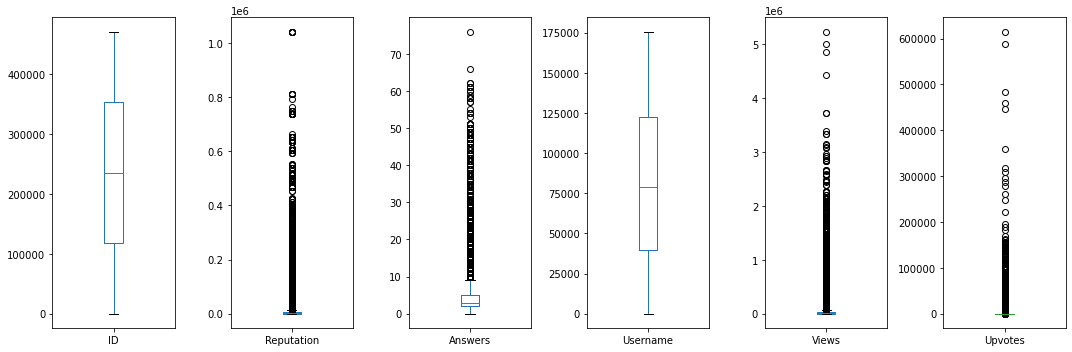

In [45]:
data.plot(kind= "box",figsize=(15,5),subplots=True)
plt.tight_layout()
plt.show()

In [46]:
col =[ 'Reputation', 'Answers', 'Views', 'Upvotes']
for i in col:
    q1=np.percentile(data[i],25,interpolation='midpoint')
    q2=np.percentile(data[i],50,interpolation='midpoint')
    q3=np.percentile(data[i],75,interpolation='midpoint')
    IQR=q3-q1
    low=q1-1.5*IQR
    up=q3+1.5*IQR
    data.drop(data.loc[((data[i]<low) | (data[i]>up))].index,inplace=True)
  

# label encoding

In [47]:
data['Tag'].unique()

array(['a', 'c', 'r', 'j', 'p', 's', 'h', 'o', 'i', 'x'], dtype=object)

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Tag'] = le.fit_transform(data['Tag'])

# splitting

In [49]:
X = data.drop(['Upvotes','ID','Username'], axis=1)
y = data['Upvotes']

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.5)

In [51]:
X_train.shape

(109683, 4)

In [52]:
X_test.shape

(109683, 4)

# LR

In [53]:
from sklearn.metrics import mean_squared_error,r2_score

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [55]:
print('MSE is :',mean_squared_error(y_test,y_pred))
print('r squared value is :',r2_score(y_test,y_pred))

MSE is : 322.55118984176755
r squared value is : 0.3948442397525036


# kNN

In [56]:
from sklearn.neighbors import KNeighborsRegressor
metric_k = []
neighbors = np.arange(15,40)

for k in neighbors:
    kn = KNeighborsRegressor(n_neighbors=k, metric='minkowski')
    kn.fit(X_train,y_train)
    y_pred = kn.predict(X_test)
    acc = mean_squared_error(y_test,y_pred)
    metric_k.append(acc)

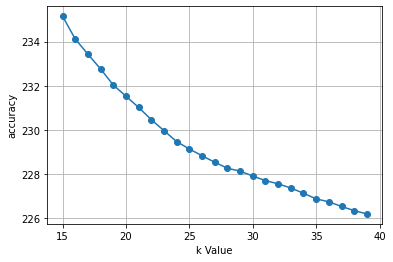

In [57]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [58]:
kn = KNeighborsRegressor(n_neighbors=40, metric='minkowski')
kn.fit(X_train,y_train)
y_pred = kn.predict(X_test)
print('MSE is :',mean_squared_error(y_test,y_pred))
print('r squared value is :',r2_score(y_test,y_pred))

MSE is : 226.0753892011524
r squared value is : 0.5758477155443553


# SVM

from sklearn.svm import SVR
sm = SVR()
sm.fit(X_train, y_train)
y_pred = sm.predict(X_test)

print('MSE is :',mean_squared_error(y_test,y_pred))
print('r squared value is :',r2_score(y_test,y_pred))

# Decision tree

In [59]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [60]:
print('MSE is :',mean_squared_error(y_test,y_pred))
print('r squared value is :',r2_score(y_test,y_pred))

MSE is : 468.23742056654174
r squared value is : 0.12151441029165877


# Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor
rc = RandomForestRegressor()
rc.fit(X_train, y_train)
y_pred = rc.predict(X_test)

In [62]:
print('MSE is :',mean_squared_error(y_test,y_pred))
print('r squared value is :',r2_score(y_test,y_pred))

MSE is : 244.57212919566132
r squared value is : 0.541144979650036


# Testing

In [63]:
test = pd.read_excel('test.xlsx')
le = LabelEncoder()
test['Tag'] = le.fit_transform(test['Tag'])
t = test.drop(['ID','Username'], axis=1)


In [64]:
result =kn.predict(t)

In [65]:
test['result']=result

In [66]:
test.head()

,ID,Tag,Reputation,Answers,Username,Views,result
0,366953,0,5645,3,50652,33200,86.050
1,71864,1,24511,6,37685,2730,40.575
2,141692,3,927,1,135293,21167,39.400
3,316833,3,21,6,166998,18528,14.625
4,440445,3,4475,10,53504,57240,72.225
